In [419]:
from PIL import Image, ImageEnhance
import rembg


In [420]:
# ouverture de l'image
img = Image.open(r'..\photo_lego\20240517_140143.jpg')

In [421]:
# Convertir l'image en png
image = img.convert('RGBA')

In [422]:
# suppression du bakground
img_bg_removed = rembg.remove(image)

In [423]:
# Obtenir les dimensions de l'image
largeur, hauteur = img_bg_removed.size

In [424]:
# recupération des points pour zommer au max l'image sans prendre en compte le background transparent
bbox = img_bg_removed.getbbox()

In [425]:
# zoom sur l'image restant
image_cropped = img_bg_removed.crop(bbox)

In [426]:
# Obtenir les dimensions de l'image
largeur, hauteur = image_cropped.size

# Calculer les coordonnées pour le recadrage
if largeur < hauteur:
    gauche = (largeur - hauteur) // 2
    haut = 0
    droite = gauche + hauteur
    bas = hauteur
else:
    haut = (hauteur - largeur) // 2
    gauche = 0
    bas = haut + largeur
    droite = largeur

# Recadrer l'image pour obtenir un carré
image_carre = image_cropped.crop((gauche, haut, droite, bas))

In [427]:
# redimensionnement de l'Image
new_size = (224, 224)

img_resize = image_carre.resize(new_size)

### Essai de travail d'image suplémentaire

In [428]:
# Amelioration de la netteté
enhancer = ImageEnhance.Sharpness(img_resize)

img_nett = enhancer.enhance(0.0)

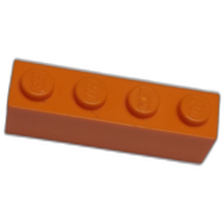

In [429]:
img_nett

In [430]:
# Sauvegarder l'image retravaillée
img_nett.save('../img_test/img_test.png')